|컬럼|컬럼명|
|------|---|
|date|일자|
|oil_gsl|휘발유|
|oil_hgsl|고급휘발유|
|oil_lo|경유|
|oil_du|두바이유|
|oil_brt|브렌트유|
|oil_cl|WTI(서부텍사스유)|
|cmdt_c|국내 금|
|cmdt_gc|국제 금|
|cmdt_pl|백금|
|cmdt_si|은|
|cmdt_pa|팔라듐|
|cmdt_go|가스오일|
|cmdt_ho|난방유|
|cmdt_ng|천연가스|
|cmdt_cdy|구리|
|cmdt_pdy|납|
|cmdt_zdy|아연|
|cmdt_ndy|니켈|
|cmdt_aay|알루미늄합금|
|cmdt_sdy|주석|
|cmdt_co|옥수수|
|cmdt_sb|설탕|
|cmdt_s|대두|
|cmdt_sm|대두박|
|cmdt_bo|대두유|
|cmdt_ct|면화|
|cmdt_w|소맥|
|cmdt_rr|쌀|
|cmdt_oj|오렌지주스|
|cmdt_kc|커피|
|cmdt_cc|코코아|
|fx_usdkrw|달러/대한민국원|
|fx_gbpusd|영국파운드/달러|
|fx_eurusd|유로/달러|
|fx_usdjpy|달러/일본엔|
|fx_usdcad|달러/캐나다달러|
|fx_usdchf|달러/스위스프랑|
|fx_usdcny|달러/중국위안|
|fx_usdsek|달러/스웨덴크로나|
|irr_cd91|CD금리(91일)|
|irr_call|콜금리(1일)|
|irr_govt03y|국고채(3년)|
|irr_corp03y|회사채(3년)|
|irr_cofixbal|COFIX잔액|
|irr_cofixnew|COFIX신규취급액|
|ss_price|삼성주가|
|ss_volume|삼성거래량|
|hn_price|하이닉스주가|
|hn_volume|하이닉스거래량|
|nd_price|NVDIA주가|
|nd_volume|NVDIA거래량|
|amd_price|AMD주가|
|amd_volume|AMD거래량|
|fng|암호화폐공포탐욕지수|
|g_trends|구글트랜드|
|dominant_topic|주제분류|
|topic_perc_contrib|주제분류확률|
|opening_price|시가|
|high_price|고가|
|low_price|저가|
|trade_price|종가|
|candle_acc_trade_price|누적거래금액|
|candle_acc_trade_volume|누적거래량|
|prev_closing_price|전일종가|
|change_price|변동가 |
|change_rate|변동율|
|ma5|이동평균5|
|ma20|이동평균20|
|ma60|이동평균60|

## 데이터 불러오기

In [ ]:
# 데이터 불러오기 

import pandas as pd

df_topic_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/df_topic_news_20220528.csv') # 뉴스 크롤링
df_finance_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/df_new_20220528.csv') # 경제지표
# df_fng = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/df_fng_20220528.csv')
# df_stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/df_stock_20220528.csv')
# df_trend = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/df_trend_20220528.csv')
df_eth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/eth_df_20220528.csv') # 암호화폐 지표, 구글트렌드, 공포탐욕지수, RAM & GPU 관련업체 주가

df_topic_news = df_topic_news[['date','Dominant_Topic','Topic_Perc_Contrib']]
df_eth = df_eth.rename(columns={'date_kst':'date'})
df_eth = df_eth.drop(['candle_date_time_utc','candle_date_time_kst','date_utc'], axis=1)


In [ ]:
df_1 = pd.merge(df_finance_data, df_topic_news,  how='outer', on='date')
df_train_data = pd.merge(df_1, df_eth,  how='outer', on='date')

# eth의 데이터가 '2017-09-25' 이후 존재
df_train_data = df_train_data.loc[(df_train_data['date'] > '2017-09-24') & (df_train_data['date'] < '2022-05-29')]
print(df_train_data['date'].min())
print(df_train_data['date'].max())

2017-09-25
2022-05-28


In [ ]:
df_train_data = df_train_data.sort_values(by='date', ascending=False)
df_train_data = df_train_data.fillna(method='bfill')
df_train_data = df_train_data.fillna(method='ffill')
df_train_data

,date,휘발유,고급휘발유,경유,두바이유,브렌트유,WTI(서부텍사스유),국내 금,국제 금,백금,...,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate,MA5,MA20,MA60
1,2022-05-28,2007.85,2225.83,2005.71,110.86,115.56,115.07,74845.11,1851.3,945.5,...,2286000.0,1.653782e+12,8.143222e+10,36021.515318,2225000.0,61000.0,0.027416,2368800.0,2620100.0,3.419633e+06
2,2022-05-27,2004.87,2223.46,2005.13,110.86,115.56,115.07,74845.11,1851.3,945.5,...,2225000.0,1.653696e+12,1.790979e+11,79286.264660,2314000.0,-89000.0,-0.038462,2418200.0,2671350.0,3.449633e+06
3,2022-05-26,2001.82,2219.47,2003.86,109.78,114.17,114.09,75176.73,1847.6,939.9,...,2314000.0,1.653610e+12,2.262575e+11,95110.336050,2494000.0,-180000.0,-0.072173,2498600.0,2732900.0,3.479633e+06
4,2022-05-25,1998.96,2217.03,2002.77,106.92,111.12,110.33,75479.26,1846.3,931.8,...,2494000.0,1.653523e+12,8.411180e+10,33407.422726,2525000.0,-31000.0,-0.012277,2546200.0,2793000.0,3.506583e+06
5,2022-05-24,1995.25,2213.25,2001.15,106.31,113.56,109.77,75533.02,1865.4,945.2,...,2525000.0,1.653437e+12,9.225153e+10,36764.889479,2533000.0,-8000.0,-0.003158,2555000.0,2847100.0,3.528517e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2017-09-29,1495.46,1829.81,1286.30,53.66,57.54,51.67,47447.33,1281.5,910.3,...,327500.0,1.506729e+12,1.704665e+04,0.052300,332500.0,-5000.0,-0.015038,329800.0,344900.0,3.642692e+05
1704,2017-09-28,1493.88,1826.03,1284.76,53.63,57.41,51.56,47361.67,1285.5,921.0,...,332500.0,1.506643e+12,1.670575e+04,0.049700,342500.0,-10000.0,-0.029197,329800.0,344900.0,3.642692e+05
1705,2017-09-27,1492.61,1828.77,1283.51,53.66,57.90,52.14,47418.46,1283.4,921.3,...,342500.0,1.506557e+12,1.667225e+04,0.050700,321500.0,21000.0,0.065319,329800.0,344900.0,3.642692e+05
1706,2017-09-26,1491.59,1827.40,1282.56,53.76,58.44,51.88,47769.37,1297.0,924.5,...,321500.0,1.506470e+12,1.674780e+04,0.051600,325000.0,-3500.0,-0.010769,329800.0,344900.0,3.642692e+05


In [ ]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1707
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1708 non-null   object 
 1   휘발유                      1708 non-null   float64
 2   고급휘발유                    1708 non-null   float64
 3   경유                       1708 non-null   float64
 4   두바이유                     1708 non-null   float64
 5   브렌트유                     1708 non-null   float64
 6   WTI(서부텍사스유)              1708 non-null   float64
 7   국내 금                     1708 non-null   float64
 8   국제 금                     1708 non-null   float64
 9   백금                       1708 non-null   float64
 10  은                        1708 non-null   float64
 11  팔라듐                      1708 non-null   float64
 12  가스오일                     1708 non-null   float64
 13  난방유                      1708 non-null   float64
 14  천연가스                    

In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_v1.pickle', 'wb') as f:
    pickle.dump(df_train_data, f)

## features 추가

In [1]:
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import holidays
import pandas as pd
import numpy as np
from datetime import datetime, date

kr_holidays = holidays.KR()

In [3]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_v1.pickle', 'rb') as f:
    data = pickle.load(f)


data = data.drop(['timestamp','Topic_Perc_Contrib'], axis=1)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.columns = [ 'date'  ,'oil_gsl'  ,'oil_hgsl'  ,'oil_lo'  ,'oil_du'  ,'oil_brt'  ,'oil_cl'  ,
'cmdt_c'  ,'cmdt_gc'  ,'cmdt_pl'  ,'cmdt_si'  ,'cmdt_pa'  ,'cmdt_go'  ,'cmdt_ho'  ,'cmdt_ng'  ,'cmdt_cdy'  ,'cmdt_pdy'  ,'cmdt_zdy'  ,'cmdt_ndy'  ,'cmdt_aay'  ,'cmdt_sdy'  ,
'cmdt_co'  ,'cmdt_sb'  ,'cmdt_s'  ,'cmdt_sm'  ,'cmdt_bo'  ,'cmdt_ct'  ,'cmdt_w'  ,'cmdt_rr'  ,'cmdt_oj'  ,'cmdt_kc'  ,'cmdt_cc'  ,
'fx_usdkrw'  ,'fx_gbpusd'  ,'fx_eurusd'  ,'fx_usdjpy'  ,'fx_usdcad'  ,'fx_usdchf'  ,'fx_usdcny'  ,'fx_usdsek'  ,'irr_cd91'  ,
'irr_call'  ,'irr_govt03y'  ,'irr_corp03y'  ,'irr_cofixbal'  ,'irr_cofixnew'  ,'ss_price'  ,'ss_volume'  ,'hn_price'  ,'hn_volume'  ,'nd_price'  ,'nd_volume'  ,'amd_price'  ,'amd_volume'  ,
'fng'  ,'g_trends'  ,'dominant_topic'  ,'market', 'opening_price'  ,'high_price'  ,'low_price'  ,'trade_price'  ,'candle_acc_trade_price'  ,'candle_acc_trade_volume'  ,
'prev_closing_price'  ,'change_price'  ,'change_rate'  ,'ma5'  ,'ma20'  ,'ma60' ] 

date_kr_text_list = []
date_us_text_list = []
date_kr_list = []
date_us_list = []

for i in [2017, 2018, 2019, 2020, 2021, 2022]:
    for date in holidays.KR(years=i).items():
        if str(date[0])[0:4] == str(i):
            date_kr_text_list.append(date[1])
            date_kr_list.append(str(date[0]))

    for date in holidays.US(years=i).items():
        if str(date[0])[0:4] == str(i):
            date_us_text_list.append(date[1])
            date_us_list.append(str(date[0]))

# 한국공휴일
kr_holi = pd.DataFrame({'date':date_kr_list,'kr_holiday':date_kr_text_list})
kr_holi['date'] = pd.to_datetime(kr_holi['date'], format='%Y-%m-%d')
# 미국공휴일
us_holi = pd.DataFrame({'date':date_us_list,'us_holiday':date_us_text_list})
us_holi['date'] = pd.to_datetime(us_holi['date'], format='%Y-%m-%d')

#merge
x = pd.merge(data, kr_holi, how='left', on = 'date')
data = pd.merge(x, us_holi, how='left', on = 'date')

#data DataFrame에 병합
data['dayofweek'] = data['date'].dt.dayofweek.astype(str).astype("category")
data['month'] = data['date'].dt.month.astype(str).astype("category")

data['dominant_topic'] = data['dominant_topic'].astype(str).astype("category")

#결측치 처리 "-"
data['kr_holiday'] = data['kr_holiday'].fillna("-")
data['us_holiday'] = data['us_holiday'].fillna("-")


# add additional features
data["trade_price_log"] = np.log(data.trade_price + 1e-8)
data["avg_trade_price_by_dow"] = data.groupby(["dayofweek"], observed=True).trade_price.transform("mean")
data["avg_trade_price_mo"] = data.groupby(["month"], observed=True).trade_price.transform("mean")

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_v2.pickle', 'wb') as f:
    pickle.dump(data, f)

## PCA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 0 to 1706
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1707 non-null   datetime64[ns]
 1   oil_gsl                  1707 non-null   float64       
 2   oil_hgsl                 1707 non-null   float64       
 3   oil_lo                   1707 non-null   float64       
 4   oil_du                   1707 non-null   float64       
 5   oil_brt                  1707 non-null   float64       
 6   oil_cl                   1707 non-null   float64       
 7   cmdt_c                   1707 non-null   float64       
 8   cmdt_gc                  1707 non-null   float64       
 9   cmdt_pl                  1707 non-null   float64       
 10  cmdt_si                  1707 non-null   float64       
 11  cmdt_pa                  1707 non-null   float64       
 12  cmdt_go                  1707 non-


고유값 : 
 [39.6151075  16.28266462  9.36325673  9.13786005]

분산설명력 : 
 [0.68108899 0.11506232 0.03804837 0.03623858]


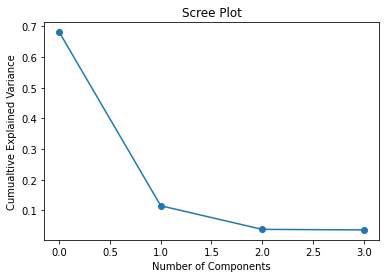

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler


scaler = MaxAbsScaler()

drop_col = data.columns[data.dtypes != 'float64'].tolist()

data_t = data.drop(columns=drop_col, axis=1)
# features = data_t.drop(columns=['trade_price','trade_price_log','avg_trade_price_by_dow','avg_trade_price_mo','change_rate','fng','g_trends','irr_cofixnew','irr_cofixbal','irr_corp03y','irr_govt03y','irr_call','irr_cd91'], axis=1).columns.tolist()
features = data_t.drop(columns=['trade_price','trade_price_log','avg_trade_price_by_dow','avg_trade_price_mo','irr_cofixnew','irr_cofixbal','irr_corp03y','irr_govt03y','irr_call','irr_cd91'], axis=1).columns.tolist()
x = data.loc[:,features].values

x = scaler.fit_transform(x)

pca = PCA(n_components=4)
pca_fit = pca.fit(x)

print("\n고유값 : \n", pca_fit.singular_values_)
print("\n분산설명력 : \n", pca_fit.explained_variance_ratio_)

import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumualtive Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-');


In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(principalComponents, columns = ['principal component1','principal component2'])
print(pca.explained_variance_ratio_)

drop_col = data.columns[data.dtypes != 'float64'].tolist()

data_pca = principalDf.join(data[drop_col], how='left')
data_pca = data_pca.join(data[['trade_price_log','trade_price']], how='left')
data_pca = data_pca[['date','market','principal component1','principal component2','kr_holiday','us_holiday','dayofweek','month','dominant_topic','trade_price_log','trade_price']]

[0.68108899 0.11506232]


In [8]:
data_pca

,date,market,principal component1,principal component2,kr_holiday,us_holiday,dayofweek,month,dominant_topic,trade_price_log,trade_price
0,2022-05-28,KRW-ETH,1.396009,-0.786981,-,-,5,5,11.0,14.642314,2286000.0
1,2022-05-27,KRW-ETH,1.412916,-0.796760,-,-,4,5,11.0,14.615267,2225000.0
2,2022-05-26,KRW-ETH,1.423096,-0.808141,-,-,3,5,11.0,14.654488,2314000.0
3,2022-05-25,KRW-ETH,1.414621,-0.780403,-,-,2,5,11.0,14.729398,2494000.0
4,2022-05-24,KRW-ETH,1.411666,-0.767117,-,-,1,5,11.0,14.741752,2525000.0
...,...,...,...,...,...,...,...,...,...,...,...
1702,2017-09-29,KRW-ETH,-0.634497,-0.315134,-,-,4,9,2.0,12.699243,327500.0
1703,2017-09-28,KRW-ETH,-0.637963,-0.307212,-,-,3,9,15.0,12.714395,332500.0
1704,2017-09-27,KRW-ETH,-0.639350,-0.317325,-,-,2,9,15.0,12.744027,342500.0
1705,2017-09-26,KRW-ETH,-0.639749,-0.326490,-,-,1,9,15.0,12.680753,321500.0


In [9]:
with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_pca_v2.pickle', 'wb') as f:
    pickle.dump(data_pca, f)

## 변수선택

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import itertools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_t = data.drop(columns= drop_col, axis=1)

formula = "trade_price ~ oil_gsl "
for i in data_t.drop(['trade_price','oil_gsl'], axis=1).columns:
    formula = formula + " + " +i
print(formula)

model = smf.ols(formula = formula, data = data_t)
result = model.fit()
print(result.summary())

trade_price ~ oil_gsl  + oil_hgsl + oil_lo + oil_du + oil_brt + oil_cl + cmdt_c + cmdt_gc + cmdt_pl + cmdt_si + cmdt_pa + cmdt_go + cmdt_ho + cmdt_ng + cmdt_cdy + cmdt_pdy + cmdt_zdy + cmdt_ndy + cmdt_aay + cmdt_sdy + cmdt_co + cmdt_sb + cmdt_s + cmdt_sm + cmdt_bo + cmdt_ct + cmdt_w + cmdt_rr + cmdt_oj + cmdt_kc + cmdt_cc + fx_usdkrw + fx_gbpusd + fx_eurusd + fx_usdjpy + fx_usdcad + fx_usdchf + fx_usdcny + fx_usdsek + irr_cd91 + irr_call + irr_govt03y + irr_corp03y + irr_cofixbal + irr_cofixnew + ss_price + ss_volume + hn_price + hn_volume + nd_price + nd_volume + amd_price + amd_volume + fng + g_trends + opening_price + high_price + low_price + candle_acc_trade_price + candle_acc_trade_volume + prev_closing_price + change_price + change_rate + ma5 + ma20 + ma60 + trade_price_log + avg_trade_price_by_dow + avg_trade_price_mo
                            OLS Regression Results                            
Dep. Variable:            trade_price   R-squared:                       1.000
Model

In [ ]:
def processSubset(X,y, feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic 
    return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['Intercept'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'Intercept']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [ ]:
from patsy import dmatrices

y,X = dmatrices(formula, data = data_t,return_type = "dataframe")

In [ ]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  69 models on 1 predictors in
Selected predictors: ['high_price', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbd75305590>
forward
Processed  1 models on 0 predictors in 0.005370616912841797
Selected predictors: ['Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbd752b1190>
Processed  68 models on 2 predictors in
Selected predictors: ['high_price', 'change_price', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbd75305e90>
forward
Processed  2 models on 1 predictors in 0.007536888122558594
Selected predictors: ['high_price', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fbd752ba5d0>
Processed  67 models on 3 predictors in
Selected predictors: ['high_price', 'change_price', 'prev_closing_price', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fb

In [ ]:
Stepwise_best_model.aic

28706.818551378034

In [ ]:
print(Stepwise_best_model.summary())

                            OLS Regression Results                            
Dep. Variable:            trade_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.471e+08
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:54:49   Log-Likelihood:                -14348.
No. Observations:                1707   AIC:                         2.871e+04
Df Residuals:                    1702   BIC:                         2.873e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
change_price           0.9998      0

In [ ]:
data_step = pd.DataFrame(Stepwise_best_model.params).reset_index()
data_step['index']

0          change_price
1    prev_closing_price
2               cmdt_cc
3             fx_gbpusd
4             Intercept
Name: index, dtype: object

In [ ]:
step_col = ['trade_price']
for i in data_step['index']:
    if i != 'Intercept':
        step_col.append(i)

print(step_col)

['trade_price', 'change_price', 'prev_closing_price', 'cmdt_cc', 'fx_gbpusd']


In [ ]:
data_t[step_col]

,trade_price,change_price,prev_closing_price,cmdt_cc,fx_gbpusd
0,2286000.0,61000.0,2225000.0,2462.0,1.2631
1,2225000.0,-89000.0,2314000.0,2462.0,1.2615
2,2314000.0,-180000.0,2494000.0,2464.0,1.2571
3,2494000.0,-31000.0,2525000.0,2407.0,1.2544
4,2525000.0,-8000.0,2533000.0,2441.0,1.2520
...,...,...,...,...,...
1702,327500.0,-5000.0,332500.0,2043.0,1.3408
1703,332500.0,-10000.0,342500.0,1980.0,1.3445
1704,342500.0,21000.0,321500.0,2015.0,1.3396
1705,321500.0,-3500.0,325000.0,1971.0,1.3418


In [ ]:
data_step = data_t[step_col].join(data[drop_col], how='left')
data_step = data_step[['date','market','change_price','prev_closing_price','cmdt_cc','fx_gbpusd','kr_holiday','us_holiday','dayofweek','month','dominant_topic','trade_price']]

In [ ]:
data_step

,date,market,change_price,prev_closing_price,cmdt_cc,fx_gbpusd,kr_holiday,us_holiday,dayofweek,month,dominant_topic,trade_price
0,2022-05-28,KRW-ETH,61000.0,2225000.0,2462.0,1.2631,-,-,5,5,11.0,2286000.0
1,2022-05-27,KRW-ETH,-89000.0,2314000.0,2462.0,1.2615,-,-,4,5,11.0,2225000.0
2,2022-05-26,KRW-ETH,-180000.0,2494000.0,2464.0,1.2571,-,-,3,5,11.0,2314000.0
3,2022-05-25,KRW-ETH,-31000.0,2525000.0,2407.0,1.2544,-,-,2,5,11.0,2494000.0
4,2022-05-24,KRW-ETH,-8000.0,2533000.0,2441.0,1.2520,-,-,1,5,11.0,2525000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1702,2017-09-29,KRW-ETH,-5000.0,332500.0,2043.0,1.3408,-,-,4,9,2.0,327500.0
1703,2017-09-28,KRW-ETH,-10000.0,342500.0,1980.0,1.3445,-,-,3,9,15.0,332500.0
1704,2017-09-27,KRW-ETH,21000.0,321500.0,2015.0,1.3396,-,-,2,9,15.0,342500.0
1705,2017-09-26,KRW-ETH,-3500.0,325000.0,1971.0,1.3418,-,-,1,9,15.0,321500.0


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_step_v2.pickle', 'wb') as f:
    pickle.dump(data_step, f)

## 핵심단어추출

In [ ]:
# 데이터 불러오기 
import pandas as pd

df_topic_news_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/news_2017_202004_20220527-1.csv')
df_topic_news_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/news_202005_202205_20220527-1.csv')
df_topic_news_1 = df_topic_news_1.loc[df_topic_news_1['date'].str[0:7] != '2020-05']
df_topic_news_3 = pd.concat([df_topic_news_1, df_topic_news_2], axis=0)
df = df_topic_news_3.sort_values(by='date', ascending=False).reset_index(drop=True)
df.head()

,date,contents
0,2022-05-28,"편집자주암호화폐와 가상자산은 금융의 미래일까, 도박 같은 거품일까. 블록체인, 비트..."
1,2022-05-27,[파이낸셜뉴스] 한동안 나스닥과 동조현상을 보이던 가상자산 시장이 최근에는 나스닥 ...
2,2022-05-26,"출처 : 코인니스 데이터 ""처음으로 ERC-721 온체인 거래량, ERC-20 추월..."
3,2022-05-25,2030세대 거래액 비중 전체의 62.4%여성 거래액 비중 40.2%로 전년比 23...
4,2022-05-24,[파이낸셜뉴스] 프랑스 명품 브랜드 발렌시아가(balenciaga)가 비트코인(BT...


In [ ]:
df.tail()

,date,contents
1597,2017-05-08,차세대 가상화폐로 부상하고 있는 이더리움 [사진 출처 : 코인원] 한동안 비트코인이...
1598,2017-05-06,[아이뉴스24 편집국] 5.9 대선을 코앞에 두고 지난 4~5일 이틀간 진행된 사전...
1599,2017-05-04,[아이뉴스24 김국배기자] IBM이 블록체인(blockchain) 기술 상용화를 위...
1600,2017-05-03,"ㆍ비트코인, 1개 170만원 돌파…투자 대상 넘어 결제 수단 사용 늘어ㆍ가격 변동성..."
1601,2017-05-02,[아이뉴스24 성지은기자] 국내 최초로 블록체인 기술에 기반한 암호화폐가 출시된다....


In [ ]:
!pip install sentence_transformers
!pip install kiwipiepy
!pip install WebOb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence_transformers
import pandas as pd
import numpy as np
import itertools

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,date,contents
0,2022-05-28,"편집자주암호화폐와 가상자산은 금융의 미래일까, 도박 같은 거품일까. 블록체인, 비트..."
1,2022-05-27,[파이낸셜뉴스] 한동안 나스닥과 동조현상을 보이던 가상자산 시장이 최근에는 나스닥 ...
2,2022-05-26,"출처 : 코인니스 데이터 ""처음으로 ERC-721 온체인 거래량, ERC-20 추월..."
3,2022-05-25,2030세대 거래액 비중 전체의 62.4%여성 거래액 비중 40.2%로 전년比 23...
4,2022-05-24,[파이낸셜뉴스] 프랑스 명품 브랜드 발렌시아가(balenciaga)가 비트코인(BT...


In [ ]:
#데이터 프레임의 'text' 열의 값들을 str 형식으로 변환
df.contents = df.contents.astype(str)

#contents date 열을 기준으로 중복된 데이터를 삭제
df_news = df.drop_duplicates(subset=['date','contents'])

#한글이 아니면 빈 문자열로 바꾸기
df_news['contents'] = df_news['contents'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

#빈 문자열 NAN 값으로 바꾸기
df_news = df_news.replace({'': np.nan})
df_news = df_news.replace(r'^\s*$', None, regex=True)

#NAN 이 있는 행은 삭제
df_news = df_news.dropna(how='any')

#인덱스
df_news = df_news.reset_index (drop = True)

#데이터 프레임에 null값 확인
print(df_news.isnull().values.any()) 

False


In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.prepare()

# kiwi가 자동으로 추측하여 미등재어를 출력하지 못하도록
# 미등재 형태소의 패널티를 높게 설정
kiwi._unk_score_scale = 1000

#텍스트 데이터를 리스트로 변환
data_list=df_news.contents.values.tolist()

#리스트를 요소별로 가져와서 명사만 추출한 후 리스트로 저장
data_word=[]
for i in range(len(data_list)):
    result = kiwi.analyze(data_list[i])
    word=[]
    for token, pos, _, _ in result[0][0]:
        if len(data_list[i]) > 100000:
            if (pos == 'NNP'): # 고유명사만 추출 | (pos == 'NNG')
                word.append(token)
        else:
            if pos.startswith('N'): 
                word.append(token)
    data_word.append(word)

#명사만 추출해서 만든 리스트
#print(data_word)

In [ ]:
import pickle
import gzip

# save and compress.
with gzip.open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/data_word_220607.pickle', 'wb') as f:
    pickle.dump(data_word, f)

In [ ]:
len(data_word)

1602

In [ ]:
import pickle
import gzip

# load and uncompress.
with gzip.open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/data_word_220607.pickle','rb') as f:
    data_word = pickle.load(f)

In [ ]:
for i in range(len(data_word)):
    print(f'{i} 번째 : {len(data_word[i])}')

In [ ]:
# 데이터 쌍 사이의 최대 합 거리는 데이터 쌍 간의 거리가 최대화되는 데이터 쌍으로 정의. 후보 간의 유사성을 최소화하면서 문서와의 후보 유사성을 극대화

def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # 문서와 각 키워드들 간의 유사도
    distances = cosine_similarity(doc_embedding, candidate_embeddings)

    # 각 키워드들 간의 유사도
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # 코사인 유사도에 기반하여 키워드들 중 상위 top_n개의 단어를 pick.
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # 각 키워드들 중에서 가장 덜 유사한 키워드들간의 조합을 계산
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [ ]:
# 문서로부터 추출한 키워드들을 SBERT를 통해서 수치화,  한국어를 포함하고 있는 다국어 SBERT를 로드
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

In [ ]:
# CountVectorizer를 사용하는 이유는 n_gram_range의 인자를 사용하면 쉽게 n-gram을 추출
# (2, 3)으로 설정하면 결과 후보는 2개의 단어를 한 묶음으로 간주하는 bigram과 3개의 단어를 한 묶음으로 간주하는 trigram을 추출

n_gram_range = (2, 3)
keyword = []
for i in range(901,len(data_word)): # range(len(data_word)):
    data_text = ' '.join(data_word[i])

    count = CountVectorizer(ngram_range=n_gram_range).fit([data_text])
    candidates = count.get_feature_names_out()

    doc_embedding = model.encode([data_text])
    candidate_embeddings = model.encode(candidates)

    kword = max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=1, nr_candidates=30)
    print(f'{i} 번쨰 단어 : {kword}')
    keyword.append(kword)

# DataFrame 저장
keyword_df = pd.DataFrame(keyword)
keyword_df.to_csv ("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01_last.csv", index = None)

901 번쨰 단어 : ['파트너십 디렉터 삼성']
902 번쨰 단어 : ['대표 스케일 네트워크']
903 번쨰 단어 : ['블록체인 실비오 칼리']
904 번쨰 단어 : ['아칸소 교수 우버']
905 번쨰 단어 : ['이번 서울']
906 번쨰 단어 : ['드링크 솔루션']
907 번쨰 단어 : ['빗썸 비트코인']
908 번쨰 단어 : ['거래 사이트 비트']
909 번쨰 단어 : ['서울경제 다음']
910 번쨰 단어 : ['업데이트 순조 개발']
911 번쨰 단어 : ['대금 비중 테마']
912 번쨰 단어 : ['캐나다 개발자']
913 번쨰 단어 : ['경제 김민영']
914 번쨰 단어 : ['스타트업 함지현']
915 번쨰 단어 : ['대상 블록체인']
916 번쨰 단어 : ['블록 내달 개최']
917 번쨰 단어 : ['인터콘티넨탈 파르나스 호텔']
918 번쨰 단어 : ['코인 데스크 코리아']
919 번쨰 단어 : ['한국경제 라이온']
920 번쨰 단어 : ['전송 이더리움 도메인']
921 번쨰 단어 : ['거래 라이트코인']
922 번쨰 단어 : ['솔브케어 트론 메디']
923 번쨰 단어 : ['관계자 한국']
924 번쨰 단어 : ['하이퍼레저 패브릭']
925 번쨰 단어 : ['클래식 전일 대비']
926 번쨰 단어 : ['클래식 전일 대비']
927 번쨰 단어 : ['거래 대금']
928 번쨰 단어 : ['기자 한국경제']
929 번쨰 단어 : ['수준 라이온']
930 번쨰 단어 : ['거래 대금']
931 번쨰 단어 : ['체인 심플 렉스']
932 번쨰 단어 : ['거래 대금']
933 번쨰 단어 : ['수준 라이온']
934 번쨰 단어 : ['스트리머 리플']
935 번쨰 단어 : ['거래소 인원 가상']
936 번쨰 단어 : ['거래 라이트코인 스트리머']
937 번쨰 단어 : ['추세 제공']
938 번쨰 단어 : ['기대 카카오 디앱사']
939 번쨰 단어 : ['운영 덱스 진출']
940 번쨰 단어 : ['업체 피

In [ ]:
x1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01_300.csv")
x2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01_600.csv")
x3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01_900.csv")
x4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01_last.csv")
keyword_df = pd.concat([x1,x2,x3,x4])
keyword_df.to_csv ("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01.csv", index = None)

In [ ]:
df_t = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01.csv")
df_temp = pd.concat([df, df_t], axis=1)
df_temp.columns = ['date','contents','keyword']
df_temp['date'] = pd.to_datetime(df_temp['date'], format='%Y-%m-%d')
data_df = pd.merge(data, df_temp,  how='outer', on='date')
data_df = data_df.loc[(data_df['date'] > '2017-09-24') & (data_df['date'] < '2022-05-29')]
data_df = data_df.drop('contents', axis=1)
data_df.head()

,date,oil_gsl,oil_hgsl,oil_lo,oil_du,oil_brt,oil_cl,cmdt_c,cmdt_gc,cmdt_pl,...,ma60,kr_holiday,us_holiday,dayofweek,month,trade_price_log,avg_trade_price_by_dow,avg_trade_price_mo,contents,keyword
0,2022-05-28,2007.85,2225.83,2005.71,110.86,115.56,115.07,74845.11,1851.3,945.5,...,3.419633e+06,-,-,5,5,14.642314,1.291994e+06,1.581151e+06,"편집자주암호화폐와 가상자산은 금융의 미래일까, 도박 같은 거품일까. 블록체인, 비트...",센터 폭락 루나
1,2022-05-27,2004.87,2223.46,2005.13,110.86,115.56,115.07,74845.11,1851.3,945.5,...,3.449633e+06,-,-,4,5,14.615267,1.285663e+06,1.581151e+06,[파이낸셜뉴스] 한동안 나스닥과 동조현상을 보이던 가상자산 시장이 최근에는 나스닥 ...,폭락 사태 도중
2,2022-05-26,2001.82,2219.47,2003.86,109.78,114.17,114.09,75176.73,1847.6,939.9,...,3.479633e+06,-,-,3,5,14.654488,1.286832e+06,1.581151e+06,"출처 : 코인니스 데이터 ""처음으로 ERC-721 온체인 거래량, ERC-20 추월...",하락 업비트 원화
3,2022-05-25,1998.96,2217.03,2002.77,106.92,111.12,110.33,75479.26,1846.3,931.8,...,3.506583e+06,-,-,2,5,14.729398,1.293299e+06,1.581151e+06,2030세대 거래액 비중 전체의 62.4%여성 거래액 비중 40.2%로 전년比 23...,방침 국내 가상
4,2022-05-24,1995.25,2213.25,2001.15,106.31,113.56,109.77,75533.02,1865.4,945.2,...,3.528517e+06,-,-,1,5,14.741752,1.288764e+06,1.581151e+06,[파이낸셜뉴스] 프랑스 명품 브랜드 발렌시아가(balenciaga)가 비트코인(BT...,명품 브랜드 발렌시아가


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/실무인증/Data/crypto_currency_data_key_v2.pickle', 'wb') as f:
    pickle.dump(data_df, f)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 0 to 1706
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1707 non-null   datetime64[ns]
 1   oil_gsl                  1707 non-null   float64       
 2   oil_hgsl                 1707 non-null   float64       
 3   oil_lo                   1707 non-null   float64       
 4   oil_du                   1707 non-null   float64       
 5   oil_brt                  1707 non-null   float64       
 6   oil_cl                   1707 non-null   float64       
 7   cmdt_c                   1707 non-null   float64       
 8   cmdt_gc                  1707 non-null   float64       
 9   cmdt_pl                  1707 non-null   float64       
 10  cmdt_si                  1707 non-null   float64       
 11  cmdt_pa                  1707 non-null   float64       
 12  cmdt_go                  1707 non-

In [ ]:
top_n = 5
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
print(keywords)

['서울 연합뉴스 이춘규', '의장 서울 선릉역', '서울 선릉역 캠프', '장비 교도 연합뉴스', '기자 국내 최초']


In [ ]:
df_temp = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/실무인증/Data/keyword_df_220607_01.csv")

In [ ]:
df = pd.concat([df, df_temp], axis=1)
df.columns = ['date','contents','keyword']
df.head()

,date,contents,keyword
0,2022-05-28,"편집자주암호화폐와 가상자산은 금융의 미래일까, 도박 같은 거품일까. 블록체인, 비트...",센터 폭락 루나
1,2022-05-27,[파이낸셜뉴스] 한동안 나스닥과 동조현상을 보이던 가상자산 시장이 최근에는 나스닥 ...,폭락 사태 도중
2,2022-05-26,"출처 : 코인니스 데이터 ""처음으로 ERC-721 온체인 거래량, ERC-20 추월...",하락 업비트 원화
3,2022-05-25,2030세대 거래액 비중 전체의 62.4%여성 거래액 비중 40.2%로 전년比 23...,방침 국내 가상
4,2022-05-24,[파이낸셜뉴스] 프랑스 명품 브랜드 발렌시아가(balenciaga)가 비트코인(BT...,명품 브랜드 발렌시아가


In [ ]:
def mmr(doc_embedding, candidate_embeddings, words, top_n, diversity):

    # 문서와 각 키워드들 간의 유사도가 적혀있는 리스트
    word_doc_similarity = cosine_similarity(candidate_embeddings, doc_embedding)

    # 각 키워드들 간의 유사도
    word_similarity = cosine_similarity(candidate_embeddings)

    # 문서와 가장 높은 유사도를 가진 키워드의 인덱스를 추출.
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # keywords_idx = [2]
    keywords_idx = [np.argmax(word_doc_similarity)]

    # 가장 높은 유사도를 가진 키워드의 인덱스를 제외한 문서의 인덱스들
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # ==> candidates_idx = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10 ... 중략 ...]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    # 최고의 키워드는 이미 추출했으므로 top_n-1번만큼 아래를 반복.
    # ex) top_n = 5라면, 아래의 loop는 4번 반복됨.
    for _ in range(top_n - 1):
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # MMR을 계산
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # keywords & candidates를 업데이트
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [ ]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=1, diversity=0.2)

['기자 국내 최초']

In [ ]:
mmr(doc_embedding, candidate_embeddings, candidates, top_n=1, diversity=0.7)

['기자 국내 최초']